In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [71]:
baseDeDonnees = pd.read_csv("Donnés\DonnesMeteorologiqueSimple2013-2024.csv", index_col = "DATE")
baseDeDonnees

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,,
2013-02-18,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,0.4,NaN,17.0,3.0,NaN,NaN
2013-02-19,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.24,2.4,0.4,NaN,32.0,11.0,NaN,NaN
2013-02-20,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.20,2.0,2.8,NaN,30.0,11.0,NaN,NaN
2013-02-21,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.08,0.8,1.6,NaN,21.0,8.0,NaN,NaN
2013-02-23,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.31,3.1,0.4,NaN,34.0,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-24,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.50,0.0,NaN,40.0,50.0,30.0,1.0,129.7
2024-04-25,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,NaN,37.0,47.0,27.0,27.0,73.8
2024-04-26,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,NaN,44.0,58.0,30.0,NaN,NaN


In [72]:
baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.006415
SNOW       0.008142
SNWD       0.662226
TAVG       0.191957
TMAX       0.009129
TMIN       0.008142
WDFG       0.292129
WSFG       0.304466
dtype: float64

In [73]:
baseDeDonneesNettoyee = baseDeDonnees[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()
baseDeDonneesNettoyee.columns = ["precip","snow","snow_depth","temp_max","temp_min"]
baseDeDonneesNettoyee

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2013-02-18,0.00,0.0,0.4,17.0,3.0
2013-02-19,0.24,2.4,0.4,32.0,11.0
2013-02-20,0.20,2.0,2.8,30.0,11.0
2013-02-21,0.08,0.8,1.6,21.0,8.0
2013-02-23,0.31,3.1,0.4,34.0,26.0
...,...,...,...,...,...
2024-04-24,0.50,0.0,NaN,50.0,30.0
2024-04-25,0.00,0.0,NaN,47.0,27.0
2024-04-26,0.00,0.0,NaN,58.0,30.0


In [74]:
null_prc = baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
null_prc

precip        0.006415
snow          0.008142
snow_depth    0.662226
temp_max      0.009129
temp_min      0.008142
dtype: float64

In [75]:
del baseDeDonneesNettoyee["snow_depth"]

In [76]:
#Remplissage des trous de donnés
baseDeDonneesNettoyee["snow"] = baseDeDonneesNettoyee["snow"].fillna(0)
baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
baseDeDonneesNettoyee


,precip,snow,temp_max,temp_min
DATE,,,,
2013-02-18,0.00,0.0,17.0,3.0
2013-02-19,0.24,2.4,32.0,11.0
2013-02-20,0.20,2.0,30.0,11.0
2013-02-21,0.08,0.8,21.0,8.0
2013-02-23,0.31,3.1,34.0,26.0
...,...,...,...,...
2024-04-24,0.50,0.0,50.0,30.0
2024-04-25,0.00,0.0,47.0,27.0
2024-04-26,0.00,0.0,58.0,30.0


In [77]:
baseDeDonneesNettoyee.index = pd.to_datetime(baseDeDonneesNettoyee.index)
baseDeDonneesNettoyee.index


DatetimeIndex(['2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-23', '2013-02-24', '2013-02-25', '2013-02-26',
               '2013-03-01', '2013-03-02',
               ...
               '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-27', '2024-04-28'],
              dtype='datetime64[ns]', name='DATE', length=4053, freq=None)

In [78]:
#Verification probleme data
baseDeDonneesNettoyee.apply(lambda x: (x==9999).sum())

precip      0
snow        0
temp_max    0
temp_min    0
dtype: int64

<Axes: xlabel='DATE'>

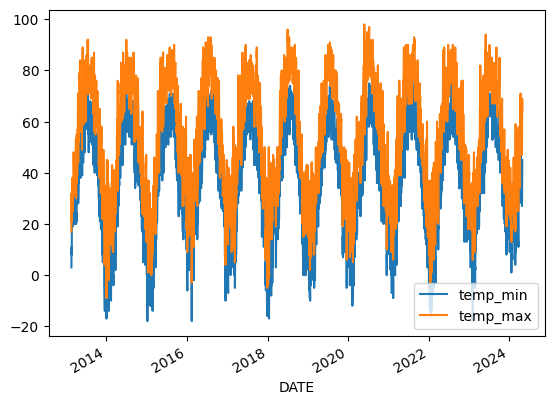

In [79]:
#Analyse pour savoir s'il y a un manque de data.
baseDeDonneesNettoyee[["temp_min","temp_max"]].plot()

<Axes: xlabel='DATE'>

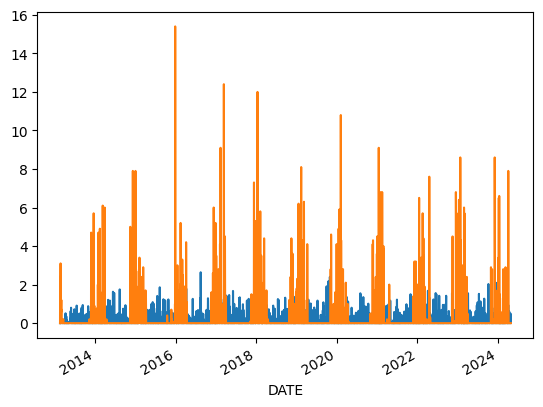

In [80]:
baseDeDonneesNettoyee.index.year.value_counts().sort_index()
baseDeDonneesNettoyee["precip"].plot()
baseDeDonneesNettoyee["snow"].plot()

In [81]:
#Choisir ce que je veux predire.
baseDeDonneesNettoyee["target"] = baseDeDonneesNettoyee.shift(-1)["temp_max"]
baseDeDonneesNettoyee = baseDeDonneesNettoyee.iloc[:-1,:].copy()
baseDeDonneesNettoyee
#Creation de mon model de Ml
reg = Ridge(alpha = .1)
predicteur = ["precip","snow","temp_max","temp_min"]
train = baseDeDonneesNettoyee[:"2023-01-31"]
test = baseDeDonnees["2023-01-01":]
reg.fit(train[predicteur],train["target"])

Ridge(alpha=0.1)